In [3]:
import os

filenames = []
for x in os.listdir('diaries'):
    if x.endswith('.txt'):
        filenames.append(x)

filenames

['2023-10-21.txt',
 '2023-10-22.txt',
 '2023-10-23.txt',
 '2023-10-24.txt',
 '2023-10-25.txt',
 '2023-10-26.txt',
 '2023-10-27.txt']

In [6]:
import re
from nltk.sentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [8]:
def get_sentiment(diary_l):
    score_l = analyzer.polarity_scores(diary_l)
    return score_l


In [14]:
!pip3.10 install matplotlib

     ---------------------------------------- 7.2/7.2 MB 411.4 kB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ------------------------------------ 163.6/163.6 kB 213.3 kB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB ? eta 0:00:00
  Using cached Pillow-9.3.0-cp310-cp310-win_amd64.whl (2.5 MB)
  Using cached numpy-1.23.5-cp310-cp310-win_amd64.whl (14.6 MB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
     ------------------------------------ 965.4/965.4 kB 206.5 kB/s eta 0:00:00


In [25]:
import matplotlib.pyplot as plt

def print_plot(dates_l, scores_l):
    plt.plot(dates_l, scores_l)
    plt.show()

In [21]:
pos_scores = []
neg_scores = []
dates = []

for filename in filenames:
    with open(f'diaries/{filename}', 'r', encoding='utf-8') as file:
        diary = file.read()
        dates.append(filename.replace('.txt',''))
    score =     get_sentiment(diary)
    print(f"{filename} -- {score}")
    pos_scores.append(score['pos'])
    neg_scores.append(score['neg'])

print(f"Positive Scores: {pos_scores}")
print(f"Negative Scores: {neg_scores}")
print(f"Dates: {dates}")




2023-10-21.txt -- {'neg': 0.138, 'neu': 0.798, 'pos': 0.065, 'compound': -0.8757}
2023-10-22.txt -- {'neg': 0.03, 'neu': 0.8, 'pos': 0.17, 'compound': 0.966}
2023-10-23.txt -- {'neg': 0.119, 'neu': 0.678, 'pos': 0.203, 'compound': 0.9169}
2023-10-24.txt -- {'neg': 0.046, 'neu': 0.716, 'pos': 0.238, 'compound': 0.9898}
2023-10-25.txt -- {'neg': 0.062, 'neu': 0.779, 'pos': 0.159, 'compound': 0.9301}
2023-10-26.txt -- {'neg': 0.125, 'neu': 0.813, 'pos': 0.062, 'compound': -0.8176}
2023-10-27.txt -- {'neg': 0.034, 'neu': 0.789, 'pos': 0.177, 'compound': 0.969}
Positive Scores: [0.065, 0.17, 0.203, 0.238, 0.159, 0.062, 0.177]
Negative Scores: [0.138, 0.03, 0.119, 0.046, 0.062, 0.125, 0.034]
Dates: ['2023-10-21', '2023-10-22', '2023-10-23', '2023-10-24', '2023-10-25', '2023-10-26', '2023-10-27']


In [42]:
import datetime

new_dates = []

for date in dates:
    temp = datetime.datetime.strptime(date,'%Y-%m-%d')
    temp = datetime.date.strftime(temp, "%b-%d")
    new_dates.append(temp)

# Diary Tone

## Positivity

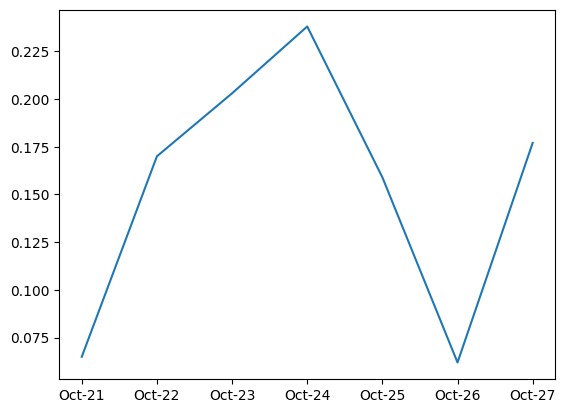

In [44]:
print_plot(new_dates, pos_scores)

## Negativity

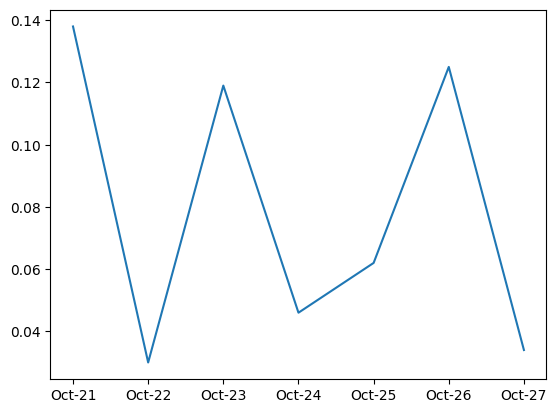

In [46]:
print_plot(new_dates, neg_scores)